In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import dateutil.parser
import re

# i am setting my jupyter to display up to 50 columns, so we can see evrything
pd.set_option('display.max_columns', 50)
pd.set_option('expand_frame_repr', True)

sns.set_palette('hls')

%matplotlib inline 

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
#i said to look at some random 3 rows
data.sample(n=3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
484,0,145,0,0,0,44.2,0.630,31,1
22,7,196,90,0,0,39.8,0.451,41,1
185,7,194,68,28,0,35.9,0.745,41,1


In [5]:
#this is me trying to check the columns of the data set
data.columns.to_list()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [6]:
#i want to check the datatype of each colums as checking data type informs me as to what i can do with my dataset
data['Pregnancies'].dtype

dtype('int64')

let me move on to EDA wit my data set
but first, i need to check for missing values in my dataset

In [7]:
#checking for missing values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

none, alright let us move

In [8]:
# i want to create a scatter plot for continous variables in my dataset
numeric_var = data.select_dtypes(include=[np.number]).columns.to_list()
print(numeric_var)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


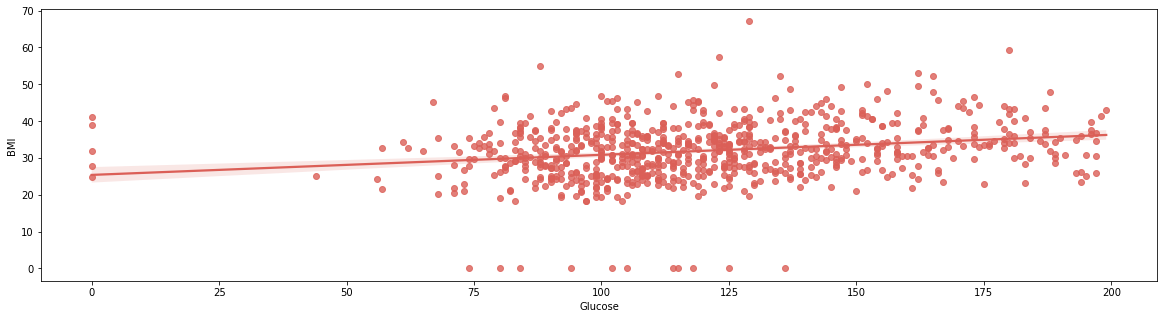

In [21]:
#i want to check for the relationship between these patients BMI and their BLOOD GLUCOSE READING
ax = sns.regplot(x = 'Glucose', y = 'BMI', data = data)
plt.rcParams["figure.figsize"] = [20,5]
#The diagram below shows that as BMI increases, blood glucose level also increases(good correlation)

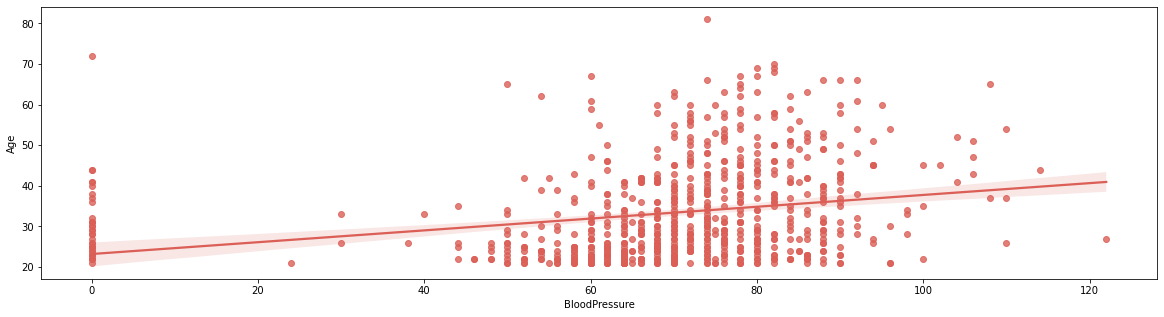

In [10]:
#OKAY LET ME SEE IF THERE IS A RELATIONSHIP BETWEEN AGE AND BLOOD PRESSURE
ax = sns.regplot(x = 'BloodPressure', y = 'Age', data = data)

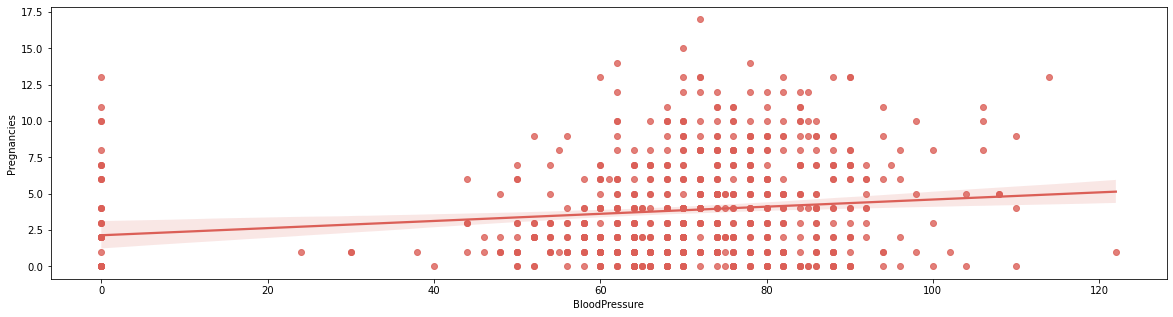

In [11]:
#checking if there is a relationship between pregnancies and bloodpressure
ax = sns.regplot(x = 'BloodPressure', y = 'Pregnancies', data = data)
#there is a fair corellation between pregnancies and increased risk of elevated bolood pressure even though majority of the 
#patients have normal blood pressure < 120/80mmHg

In [12]:
#i want to see if i can gain more insight into my data by using a scatter matrix
#let me take 3 columns
cols = ['BloodPressure', 'Glucose', 'Age']
new_df = data[cols]

In [13]:
new_df

,BloodPressure,Glucose,Age
0,72,148,50
1,66,85,31
2,64,183,32
3,66,89,21
4,40,137,33
...,...,...,...
763,76,101,63
764,70,122,27
765,72,121,30
766,60,126,47


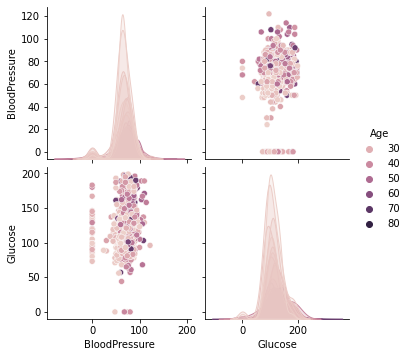

In [14]:
sns.pairplot(new_df, hue='Age')

this gives me more information as to, okay we have more patients around 30-40 years than every other age group
having blood glucose reading between
about 80-200mgldl.
i am also noticing that, our sample size captures more people in their 30s than any other age

In [15]:
#okay lets do that for BMI, let us make some more inferences 
cols = ['BloodPressure', 'Glucose', 'BMI']
df2= data[cols]

In [16]:
df2

,BloodPressure,Glucose,BMI
0,72,148,33.6
1,66,85,26.6
2,64,183,23.3
3,66,89,28.1
4,40,137,43.1
...,...,...,...
763,76,101,32.9
764,70,122,36.8
765,72,121,26.2
766,60,126,30.1


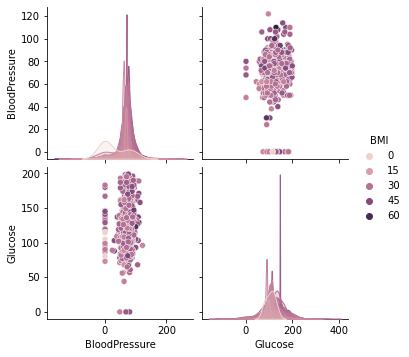

In [17]:
sns.pairplot(df2, hue='BMI')

LET ME SEE WHAT IF I CAN GAIN CLARITY ON THE GLUCOSE PROFILE OF PATIENTS BY THEIR AGE USING THE BARCHART

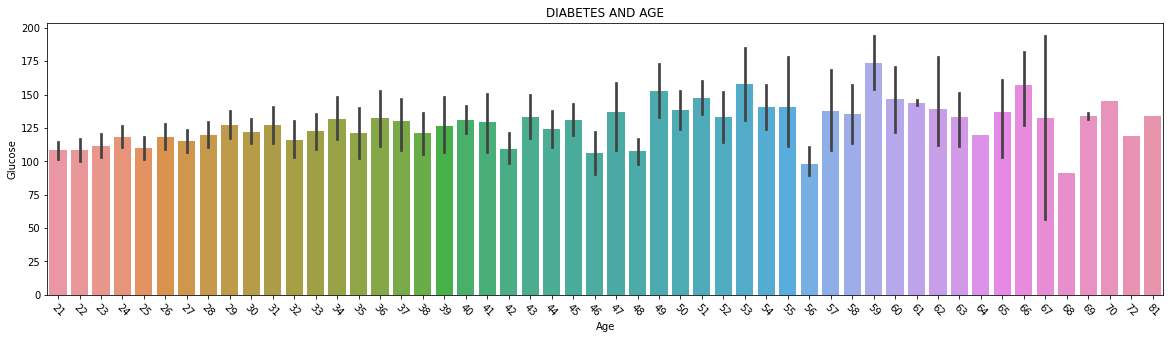

In [18]:
p = sns.barplot(x = 'Age', y = 'Glucose',
               data = data, estimator=np.mean );
p.set(title = 'DIABETES AND AGE')
p.set_xticklabels(p.get_xticklabels(), rotation = -45);
#plt.xlim(80,200)
plt.rcParams["figure.figsize"] = [20,5]

This barchart is helping me see that people aged 59 recorded the highest blood blood glucose level

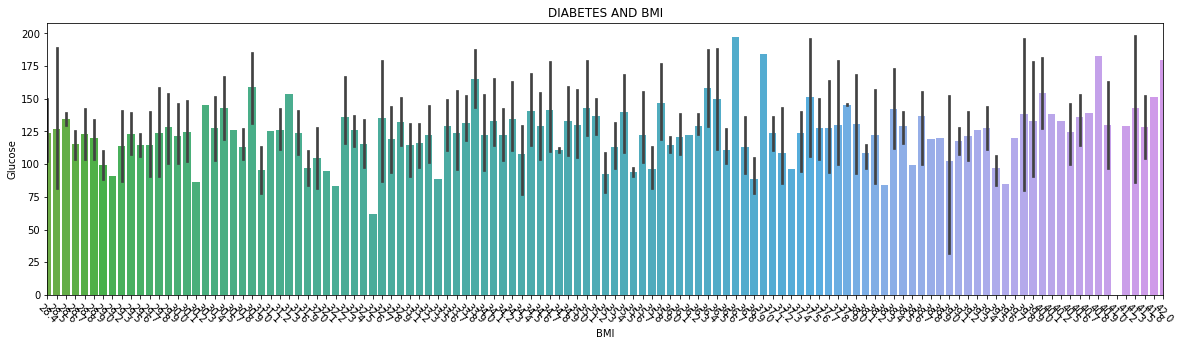

In [19]:
p = sns.barplot(x = 'BMI', y = 'Glucose',
               data = data, estimator=np.mean );
p.set(title = 'DIABETES AND BMI')
p.set_xticklabels(p.get_xticklabels(), rotation = -45);
plt.xlim(80,200)
plt.rcParams["figure.figsize"] = [20,5]

i an infer that higher bmi is associated with higher blood glucose level

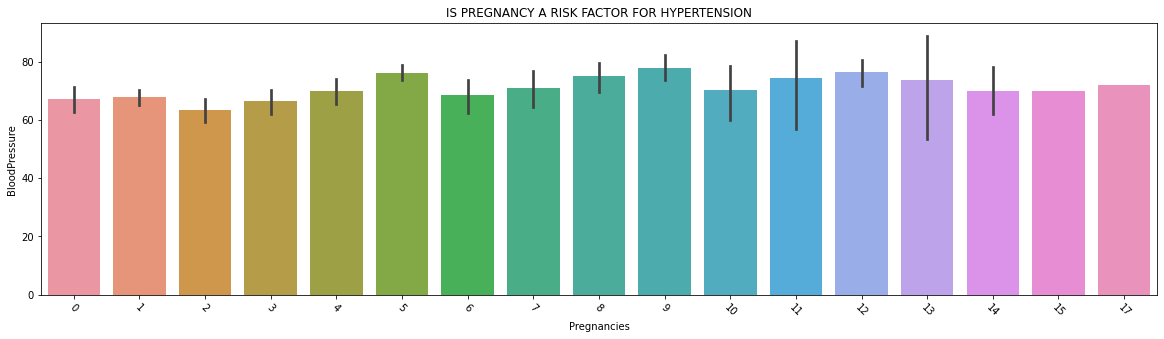

In [20]:
p = sns.barplot(x = 'Pregnancies', y = 'BloodPressure',data = data, estimator=np.mean );
p.set(title = 'IS PREGNANCY A RISK FACTOR FOR HYPERTENSION')
p.set_xticklabels(p.get_xticklabels(), rotation = -45);
#plt.xlim(80,200)
#
plt.rcParams["figure.figsize"] = [20,5]

NO SIGNIFICANT RELATIONSHIP IS SEEN